<a href="https://colab.research.google.com/github/schittap/Mathematical-Finance/blob/main/stock_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

**Graph of User-Inputted Ticker's Difference Between Opening and Closing Prices Over Time Using Yahoo Finance API and Matplotlib**

Enter stock ticker (e.g. AAPL): GME
Enter frequency:
6 months = "6mo"
1 year = "1y"
2 years = "2y"
5 years = "5y"
10 years = "10y"
Year-to-date = "ytd"
All time = "max"
5 years
Try again, using the above options: 5y


Text(0, 0.5, 'Opening - Closing Price in US Dollars')

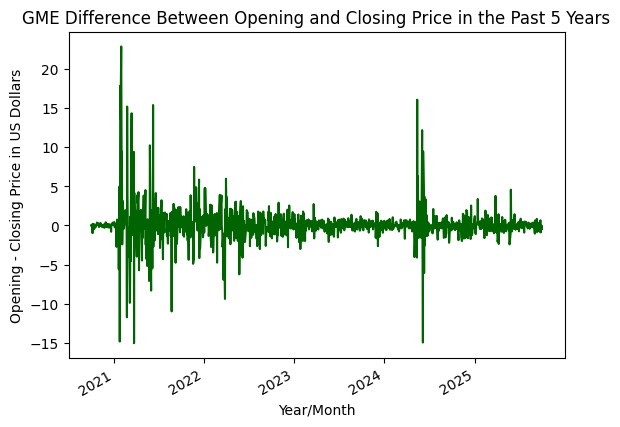

In [12]:
stock_ticker = input("Enter stock ticker (e.g. AAPL): ")
stock_ticker_yf = yf.Ticker(stock_ticker)
length = input("Enter frequency:\n6 months = \"6mo\"\n1 year = \"1y\"\n2 years = \"2y\"\n5 years = \"5y\"\n10 years = \"10y\"\nYear-to-date = \"ytd\"\nAll time = \"max\"\n")
end_title = "in the Past"
end_duration = ""

while (length != "6mo" and length != "1y" and length != "2y" and
       length != "5y" and length != "10y" and length != "ytd"
       and length != "max"):
  length = input("Try again, using the above options: ")

if (length == "6mo"):
  end_duration = end_title + " 6 Months"
elif (length == "1y"):
  end_duration = end_title + " 1 Year"
elif (length == "2y"):
  end_duration = end_title + " 2 Years"
elif (length == "5y"):
  end_duration = end_title + " 5 Years"
elif (length == "10y"):
  end_duration = end_title + " 10 Years"
elif (length == "ytd"):
  end_duration = end_title + " Since Jan 1 This Year"
elif (length == "max"):
  end_duration = "Over Time"

ticker_data = stock_ticker_yf.history(period = length)
(ticker_data['Open'] -
 ticker_data['Close']).plot(title = str(stock_ticker) +
                                                  " Difference Between Opening and Closing Price " +
                          end_duration, color = 'darkgreen')
plt.xlabel("Year/Month")
plt.ylabel("Opening - Closing Price in US Dollars")

